# Formula One: Predicting The World Champions Of Tomorrow
### Anthony Chen, Ayush Saldhi and Taylor Oglow


### Demonstration that the data can be read into R

In [1]:
library (tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
# Reading entire data set from Git Hub

constructor_standings <- read_csv("data_set/constructor_standings.csv") 

constructor_results <- read_csv("data_set/constructor_results.csv") 
    
driver_standings <- read_csv("data_set/driver_standings.csv")

pit_stops <- read_csv("data_set/pit_stops.csv")
           
qualifying <- read_csv("data_set/qualifying.csv") 

results <- read_csv("data_set/results.csv") 

races <- read_csv("data_set/races.csv") 

status <- read_csv("data_set/status.csv") 


### Files used

circuits <- read_csv("data_set/circuits.csv")

constructors <- read_csv("data_set/constructors.csv")

drivers <- read_csv("data_set/drivers.csv")

races <- read_csv("data_set/races.csv") 

lap_times <- read_csv("data_set/lap_times.csv") 

constructor_standings <- read_csv("data_set/constructor_standings.csv") 

driver_standings <- read_csv("data_set/driver_standings.csv")

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 33394 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): driverStandingsId, raceId, driverId, points, position, wins


ℹ Use `spec()` to retrieve the full column specificatio

### Cleaning and wrangling data

Before commencing the process of predicting the standings of all 20 drivers and their respective teams in the upcoming 2022 Formula 1 World Championship, it is crucial to wrangle the data for the scope of this project.

This process first begins by filtering for the Grand Prix's that are scheduled to take place in the upcoming season:

After cross-referencing the 2022 Formula 1 Race Calendar with the 'circuits' 

In [ ]:
# Filtering 2022 GP circuits 

# Vector of 2022 GP locations

locations_2022 <- c("Sakhir", "Jeddah", "Melbourne", "Imola", "Miami", "Montmeló", "Monte-Carlo", "Baku", "Montreal", "Silverstone", "Spielberg", 
                    "Le Castellet", "Budapest", "Spa", "Zandvoort", "Monza", "Sochi", "Marina Bay", "Suzuka", "Austin", "Mexico City", "São Paulo", "Abu Dhabi")

In [15]:


# Filtering circuit data set by locations vector 

circuits_2022 <- circuits %>% 
           filter(location %in% locations_2022) %>%
           filter(name != "A1-Ring") %>%
           select(circuitId:alt)

# circuits_2022


# Extracting 2022 circuit ID's 


circuit_ids <- circuits_2022 %>%
              pull(circuitId)

# circuit_ids


# Extracting 2022 circuit name and ID's


circuits_IDS <- circuits_2022 %>%
                select(circuitId, name, country, location) %>% 
                arrange(country)

# circuits_IDS


In [16]:
# Filtering 2022 Constructors

team_names <- c("Alfa Romeo", "AlphaTauri", "Alpine F1 Team", "Aston Martin", "Ferrari", 
                "Haas F1 Team", "McLaren", "Mercedes", "Red Bull", "Williams")

teams_2022 <- constructors %>%
                 filter(name %in% team_names)

# teams_2022


# Extracting 2022 Constructor ID's

constructor_ids <- teams_2022 %>%
              pull(constructorId)

# constructor_ids

In [17]:
# Filtering 2022 Drivers

driver_surnames <- c("Hamilton", "Russell", "Albon", "Zhou", "Bottas", "Gasly", "Tsunoda", "Alonso", "Ocon", "Vettel", "Stroll", 
                     "Leclerc", "Sainz", "Mazepin", "Schumacher", "Ricciardo", "Norris", "Verstappen", "Pérez", "Latifi")
 
drivers_2022 <- drivers %>%
                filter(surname %in% driver_surnames) %>%
                filter(!(forename %in% c("Ralf", "Michael", "Jos", "Duncan")))

# drivers_2022 


# Extracting Driver IDS

driver_ids <- drivers_2022 %>%
              pull(driverId)

# driver_ids

# Extracting Driver Codes

driver_codes <- drivers_2022 %>%
              pull(code)

# driver_codes

# Combining IDS and Codes

driver_id_code <- data.frame(driver_ids, driver_codes)

# driver_id_code

In [18]:
#### Filtering Race Data for 2022 Races

past_2022_races <- races %>%
                    filter(circuitId %in% circuit_ids) %>%
                    filter(year != "2022")

# past_2022_races


##### Extracting Race ID's

race_ids <- past_2022_races %>%
            pull(raceId)

# race_ids

##### Filtering Race Data For All 23 Circuits

bahrain <- past_2022_races %>% 
            filter(circuitId == 3) %>%
            arrange(desc(year))

sa <- past_2022_races %>% 
            filter(circuitId == 77) %>%
            arrange(desc(year))

aus <- past_2022_races %>% 
            filter(circuitId == 1) %>%
            arrange(desc(year))

imola <- past_2022_races %>% 
            filter(circuitId == 21) %>%
            arrange(desc(year))

miami <- past_2022_races %>% 
            filter(circuitId == 79) %>%
            arrange(desc(year))

spain <- past_2022_races %>% 
            filter(circuitId == 4) %>%
            arrange(desc(year))

monaco <- past_2022_races %>% 
            filter(circuitId == 6) %>%
            arrange(desc(year))

azerbijan <- past_2022_races %>% 
            filter(circuitId == 73) %>%
            arrange(desc(year))

canada <- past_2022_races %>% 
            filter(circuitId == 7) %>%
            arrange(desc(year))

uk <- past_2022_races %>% 
            filter(circuitId == 9) %>%
            arrange(desc(year))

austria <- past_2022_races %>% 
            filter(circuitId == 70) %>%
            arrange(desc(year))

france <- past_2022_races %>% 
            filter(circuitId == 34) %>%
            arrange(desc(year))

hungary <- past_2022_races %>% 
            filter(circuitId == 11) %>%
            arrange(desc(year))

belgium <- past_2022_races %>% 
            filter(circuitId == 13) %>%
            arrange(desc(year))

netherlands <- past_2022_races %>% 
            filter(circuitId == 39) %>%
            arrange(desc(year))

monza <- past_2022_races %>% 
            filter(circuitId == 14) %>%
            arrange(desc(year))

russia <-  past_2022_races %>% 
            filter(circuitId == 71) %>%
            arrange(desc(year))

singapore <- past_2022_races %>% 
            filter(circuitId == 15) %>%
            arrange(desc(year))

japan <- past_2022_races %>% 
            filter(circuitId == 22) %>%
            arrange(desc(year))

austin <- past_2022_races %>% 
            filter(circuitId == 69) %>%
            arrange(desc(year))

mexico <- past_2022_races %>% 
            filter(circuitId == 32) %>%
            arrange(desc(year))

brazil <- past_2022_races %>% 
            filter(circuitId == 18) %>%
            arrange(desc(year))

uae <- past_2022_races %>% 
            filter(circuitId == 24) %>%
            arrange(desc(year))

In [19]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Drivers

ham_laps <- lap_data %>%
            filter(driverId == 1)

alo_laps <- lap_data %>%
            filter(driverId == 4)

vet_laps <- lap_data %>%
            filter(driverId == 20)

gas_laps <- lap_data %>%
            filter(driverId == 842)

per_laps <- lap_data %>%
            filter(driverId == 815)

ric_laps <- lap_data %>%
            filter(driverId == 817)

bot_laps <- lap_data %>%
            filter(driverId == 822)

ver_laps <- lap_data %>%
            filter(driverId == 830)

sai_laps <- lap_data %>%
            filter(driverId == 832)

oco_laps <- lap_data %>%
            filter(driverId == 839)

str_laps <- lap_data %>%
            filter(driverId == 840)

lec_laps <- lap_data %>%
            filter(driverId == 844)

nor_laps <- lap_data %>%
            filter(driverId == 846)

rus_laps <- lap_data %>%
            filter(driverId == 847)

alb_laps <- lap_data %>%
            filter(driverId == 848)

lat_laps <- lap_data %>%
            filter(driverId == 849)

tsu_laps <- lap_data %>%
            filter(driverId == 852)

# maz_laps <- lap_data %>%
#             filter(driverId == 853)

# upon review of teamates, Mazepin can be deleted. 

msc_laps <- lap_data %>%
            filter(driverId == 854)

zho_laps <- lap_data %>%
            filter(driverId == 855)

mag_laps <- lap_data %>%
            filter(driverId == 825)
#new driver, Kevin Magnussen

### Visualizing the data in an initial plot

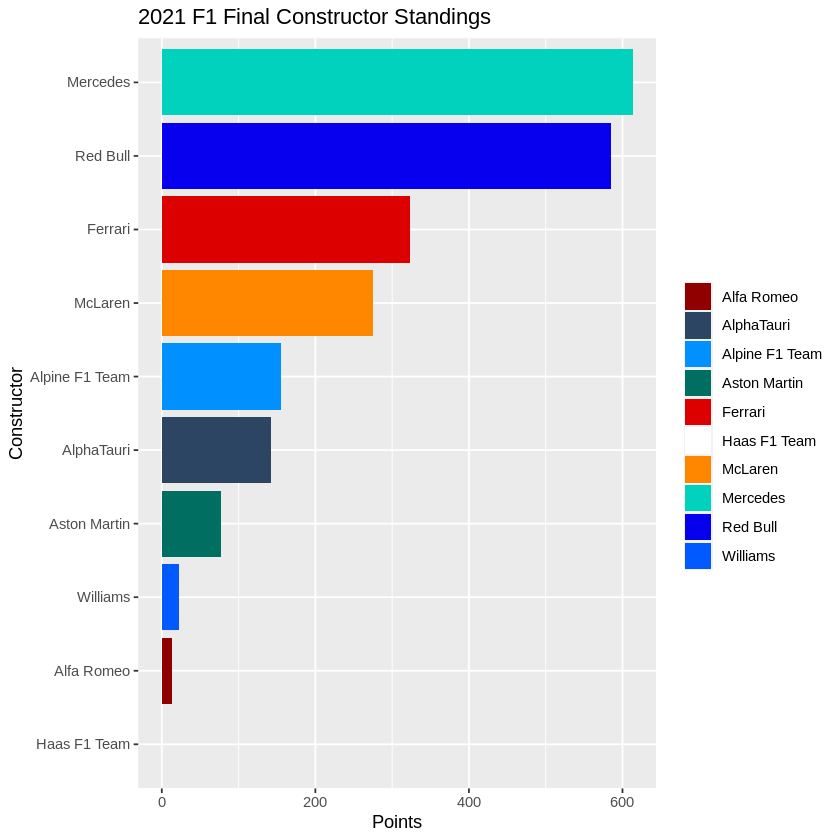

In [147]:
#Visualizing the 2021 constructor data into a bar chart, using constructors.csv and constructor standings.csv

constructor_filtered <- constructor_standings %>%
    select (raceId, constructorId, points) %>%
    filter (raceId == 1073) %>%
    arrange (desc (points))

constructor_filtered$constructorId <- as.factor(constructor_filtered$constructorId)
constructor_filtered$raceId <- as.factor(constructor_filtered$raceId)
#change raceId and Constructor Id coltype to <fct> 

#The below columns were changed to have the Racing Team name instead of RaceId. Please edit this if you find a cleaner way to code this
constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 6] <- "Ferrari"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 131] <- "Mercedes"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 9] <- "Red Bull"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 1] <- "McLaren"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 213] <- "AlphaTauri"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 117] <- "Aston Martin"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 51] <- "Alfa Romeo"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 214] <- "Alpine F1 Team"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 3] <- "Williams"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 210] <- "Haas F1 Team"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

#RACE ID's 1052-1073 = 2021 season. Final points are already displayed under RACEID 1073 since cumulative points are tracked under "points"

constructor_bar <- constructor_filtered %>% 
    ggplot(aes(reorder(constructorId, +points), points, fill = constructorId)) +
    geom_bar (stat = "identity")+
    scale_fill_manual(values = c("#900000",
                                 "#2B4562",
                                 "#0090FF",
                                 "#006F62",
                                 "#DC0000",
                                 "#FFFFFF",
                                 "#FF8700",
                                 "#00D2BE",
                                 "#0600EF",
                                 "#005AFF"))+ 
    labs (title = "2021 F1 Final Constructor Standings", 
         x = "Constructor",
         y = "Points",
         fill = "") 
    #color swatches correspond to the official colors used on television https://www.reddit.com/r/formula1/comments/lfpyfp/f1_2021_team_colors_hex_codes/
    # theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))
    # Use this code if want to remove coord_flip and change (+ aes points to -)

constructor_flipped<- constructor_bar+coord_flip ()
constructor_flipped
# constructor_flipped + annotate ("text", x = 10, y = 567, label = "613.5")
# option of annotating if makes more readable

